## Read and Plot the metrics from the testing of the CNN

### CNN ran with spatial component added, with the spectra binned into various channels/bin values & the metrics saved in ./metrics/ directory as .txt files

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setup array with the total number of channels (each bin contains 848/#channels)

channels = np.array([848, 424, 283, 212, 170, 142, 122, 106, 85, 53, 22, 15])#, 10, 5])

In [3]:
testimage = ['108', '000', 'north']

In [4]:
accuracy = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
avg_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
avg_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
avg_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
sky_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
sky_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
sky_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
clouds_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
clouds_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
clouds_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
veg_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
veg_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
veg_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
wtr_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
wtr_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
wtr_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
blt_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
blt_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
blt_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
windows_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
windows_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
windows_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
rds_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
rds_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
rds_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
cars_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
cars_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
cars_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
mtl_prec = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
mtl_recall = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}
mtl_f1 = {'108':[np.zeros(channels.shape[0])], '000':[np.zeros(channels.shape[0])], 'north':[np.zeros(channels.shape[0])]}

In [5]:
def read_prec_recall(file, line):
    Nums = []
    for num in file[line].split():
        try:
            Nums.append(float(num))
        except ValueError:
            pass
    prec = Nums[0]
    recall = Nums[1]
    f1 = Nums[2]
    
    return prec, recall, f1

In [6]:
# Get 848 bins for 108, 000, north 
i = 0
for testim in testimage:
    filename = "./metrics/CNN_Model2_spatial_train_{0}_test_{0}_metrics.txt".format(testim)
    print(filename)
    f = open(filename, "r")
    f1 = f.readlines()
    # read accuracy from 13th line
    n = 12
    if testim == "000":
        n = 11
    accuracy[testim][0][i] = float(f1[n])

    sky_prec[testim][0][i], sky_recall[testim][0][i], sky_f1[testim][0][i] = read_prec_recall(f1, n+5)
    clouds_prec[testim][0][i], clouds_recall[testim][0][i], clouds_f1[testim][0][i] = read_prec_recall(f1, n+6)
    veg_prec[testim][0][i], veg_recall[testim][0][i], veg_f1[testim][0][i] = read_prec_recall(f1, n+7)
    if testim == "000":
        n = 19
    else:
        wtr_prec[testim][0][i], wtr_recall[testim][0][i], wtr_f1[testim][0][i] = read_prec_recall(f1, 20) 
        n = 21
    blt_prec[testim][0][i], blt_recall[testim][0][i], blt_f1[testim][0][i] = read_prec_recall(f1, n)
    windows_prec[testim][0][i], windows_recall[testim][0][i], windows_f1[testim][0][i] = read_prec_recall(f1, n+1)
    rds_prec[testim][0][i], rds_recall[testim][0][i], rds_f1[testim][0][i] = read_prec_recall(f1, n+2)
    cars_prec[testim][0][i], cars_recall[testim][0][i], cars_f1[testim][0][i] = read_prec_recall(f1, n+3)
    mtl_prec[testim][0][i], mtl_recall[testim][0][i], mtl_f1[testim][0][i] = read_prec_recall(f1, n+4)
    
    avg_prec[testim][0][i], avg_recall[testim][0][i], avg_f1[testim][0][i] = read_prec_recall(f1, n+6)
    
    f.close()

./metrics/CNN_Model2_spatial_train_108_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_000_test_000_metrics.txt
./metrics/CNN_Model2_spatial_train_north_test_north_metrics.txt


In [7]:
# loop through files reading:
# accuracy, avg precision and recall, and vegetation precision and recall

for testim in testimage:
    i=1
    for channel in channels[1:]:
        filename = "./metrics/CNN_Model2_spatial_train_{0}_binned_{1}_test_{0}_metrics.txt".format(testim, channel)
        print(filename)
        f = open(filename, "r")
        f1 = f.readlines()

        # read accuracy from 13th line
        n = 12
        if testim == "000":
            n = 11
        accuracy[testim][0][i] = float(f1[n])
   
        sky_prec[testim][0][i], sky_recall[testim][0][i], sky_f1[testim][0][i] = read_prec_recall(f1, n+5)
        clouds_prec[testim][0][i], clouds_recall[testim][0][i], clouds_f1[testim][0][i] = read_prec_recall(f1, n+6)
        veg_prec[testim][0][i], veg_recall[testim][0][i], veg_f1[testim][0][i] = read_prec_recall(f1, n+7)
        if testim == "000":
            n = 19
        else:
            wtr_prec[testim][0][i], wtr_recall[testim][0][i], wtr_f1[testim][0][i] = read_prec_recall(f1, 20) 
            n = 21
        blt_prec[testim][0][i], blt_recall[testim][0][i], blt_f1[testim][0][i] = read_prec_recall(f1, n)
        windows_prec[testim][0][i], windows_recall[testim][0][i], windows_f1[testim][0][i] = read_prec_recall(f1, n+1)
        rds_prec[testim][0][i], rds_recall[testim][0][i], rds_f1[testim][0][i] = read_prec_recall(f1, n+2)
        cars_prec[testim][0][i], cars_recall[testim][0][i], cars_f1[testim][0][i] = read_prec_recall(f1, n+3)
        mtl_prec[testim][0][i], mtl_recall[testim][0][i], mtl_f1[testim][0][i] = read_prec_recall(f1, n+4)
        
        avg_prec[testim][0][i], avg_recall[testim][0][i], avg_f1[testim][0][i] = read_prec_recall(f1, n+6)
 
        f.close()
        i += 1

./metrics/CNN_Model2_spatial_train_108_binned_424_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_283_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_212_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_170_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_142_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_122_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_106_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_85_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_53_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_22_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_108_binned_15_test_108_metrics.txt
./metrics/CNN_Model2_spatial_train_000_binned_424_test_000_metrics.txt
./metrics/CNN_Model2_spatial_train_000_binned_283_test_000_metrics.txt
./metrics/CNN_Model2_spatial_train_000_binned_212_test_000_metrics.txt
./metrics/

In [8]:
print(accuracy)

{'108': [array([0.965625 , 0.95     , 0.9515625, 0.953125 , 0.94375  , 0.9328125,
       0.9296875, 0.9203125, 0.9140625, 0.915625 , 0.89375  , 0.88125  ])], '000': [array([0.91842475, 0.92686357, 0.89029536, 0.87623066, 0.85372714,
       0.86216596, 0.86919831, 0.85794655, 0.86216596, 0.82559775,
       0.84106892, 0.7862166 ])], 'north': [array([0.90648247, 0.89585547, 0.90329437, 0.89266738, 0.89585547,
       0.86503719, 0.89160468, 0.88310308, 0.8629118 , 0.8575983 ,
       0.81827843, 0.77895855])]}


In [9]:
print(avg_prec)

{'108': [array([0.97, 0.95, 0.95, 0.95, 0.94, 0.94, 0.93, 0.92, 0.91, 0.91, 0.84,
       0.85])], '000': [array([0.92, 0.93, 0.9 , 0.89, 0.86, 0.87, 0.87, 0.87, 0.86, 0.83, 0.84,
       0.74])], 'north': [array([0.9 , 0.89, 0.9 , 0.9 , 0.89, 0.88, 0.89, 0.88, 0.86, 0.86, 0.83,
       0.79])]}


In [10]:
print(avg_recall)

{'108': [array([0.97, 0.95, 0.95, 0.95, 0.94, 0.93, 0.93, 0.92, 0.91, 0.92, 0.89,
       0.88])], '000': [array([0.92, 0.93, 0.89, 0.88, 0.85, 0.86, 0.87, 0.86, 0.86, 0.83, 0.84,
       0.79])], 'north': [array([0.91, 0.9 , 0.9 , 0.89, 0.9 , 0.87, 0.89, 0.88, 0.86, 0.86, 0.82,
       0.78])]}


In [11]:
print(avg_f1)

{'108': [array([0.97, 0.95, 0.95, 0.95, 0.94, 0.92, 0.91, 0.9 , 0.9 , 0.9 , 0.86,
       0.86])], '000': [array([0.92, 0.93, 0.89, 0.86, 0.84, 0.85, 0.86, 0.84, 0.85, 0.8 , 0.83,
       0.76])], 'north': [array([0.9 , 0.89, 0.9 , 0.89, 0.89, 0.86, 0.88, 0.87, 0.86, 0.85, 0.8 ,
       0.74])]}


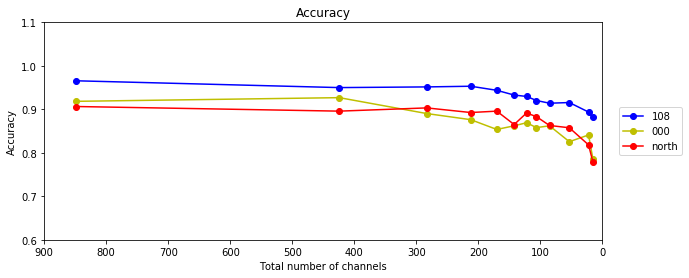

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, accuracy['108'][0], '-o', color='b', label='108')
ax.plot(channels, accuracy['000'][0], '-o', color='y', label='000')
ax.plot(channels, accuracy['north'][0], '-o', color='r', label='north')
ax.set(title="Accuracy")
ax.set_xlim(900,0)
ax.set_ylim(0.6,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Accuracy")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

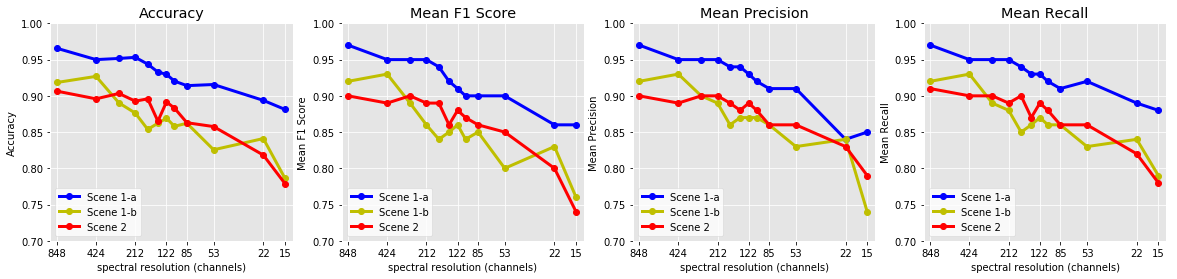

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

channelsp = [848, 424, 212, 122, 85, 53, 22, 15]

f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 4))
ax1.plot(channels, accuracy['108'][0], '-o', color='b', lw=3, label='Scene 1-a')
ax1.plot(channels, accuracy['000'][0], '-o', color='y', lw=3, label='Scene 1-b')
ax1.plot(channels, accuracy['north'][0], '-o', color='r', lw=3, label='Scene 2')
ax1.set(title="Accuracy")
ax1.set_ylim(0.7, 1.0)
ax1.set_xlabel("spectral resolution (channels)")
ax1.set_ylabel("Accuracy")
#ax1.invert_xaxis()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, facecolor='white', loc='lower left')
ax1.set_xscale('log', basex=2)
ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.set_xticks(channelsp)
ax1.set_xlim(950, 13)

ax2.plot(channels, avg_f1['108'][0], '-o', color='b', lw=3)
ax2.plot(channels, avg_f1['000'][0], '-o', color='y', lw=3)
ax2.plot(channels, avg_f1['north'][0], '-o', color='r', lw=3)
ax2.set(title="Mean F1 Score")
ax2.set_ylim(0.7, 1.0)
ax2.set_xlabel("spectral resolution (channels)")
ax2.set_ylabel("Mean F1 Score")
#ax2.invert_xaxis()
ax2.legend(handles, labels, facecolor='white', loc='lower left')
ax2.set_xscale('log', basex=2)
ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.set_xticks(channelsp)
ax2.set_xlim(950, 13)

ax3.plot(channels, avg_prec['108'][0], '-o', color='b', lw=3)
ax3.plot(channels, avg_prec['000'][0], '-o', color='y', lw=3)
ax3.plot(channels, avg_prec['north'][0], '-o', color='r',lw=3)
ax3.set(title="Mean Precision")
ax3.set_ylim(0.7, 1.0)
ax3.set_xlabel("spectral resolution (channels)")
ax3.set_ylabel("Mean Precision")
ax3.invert_xaxis()
ax3.legend(handles, labels, facecolor='white', loc='lower left')
ax3.set_xscale('log', basex=2)
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.set_xticks(channelsp)
ax3.set_xlim(950, 13)

ax4.plot(channels, avg_recall['108'][0], '-o', color='b', lw=3, label='Scene 1-a')
ax4.plot(channels, avg_recall['000'][0], '-o', color='y', lw=3, label='Scene 1-b')
ax4.plot(channels, avg_recall['north'][0], '-o', color='r', lw=3, label='Scene 2')
ax4.set(title="Mean Recall")
ax4.set_ylim(0.7, 1.0)
ax4.set_xlabel("spectral resolution (channels)")
ax4.set_ylabel("Mean Recall")
ax4.invert_xaxis()
ax4.legend(handles, labels, facecolor='white', loc='lower left')
ax4.set_xscale('log', basex=2)
ax4.xaxis.set_major_formatter(ScalarFormatter())
ax4.set_xticks(channelsp)
ax4.set_xlim(950, 13)

#handles, labels = ax4.get_legend_handles_labels()
#ax4.legend(handles, labels, loc='center right', borderaxespad=-15.0, bbox_to_anchor=(1.05, 1.05))

plt.show()
f.savefig("./plots/CNN_spatial_train_all_Overall_Binned_metrics.png", bbox_inches='tight', dpi=300)

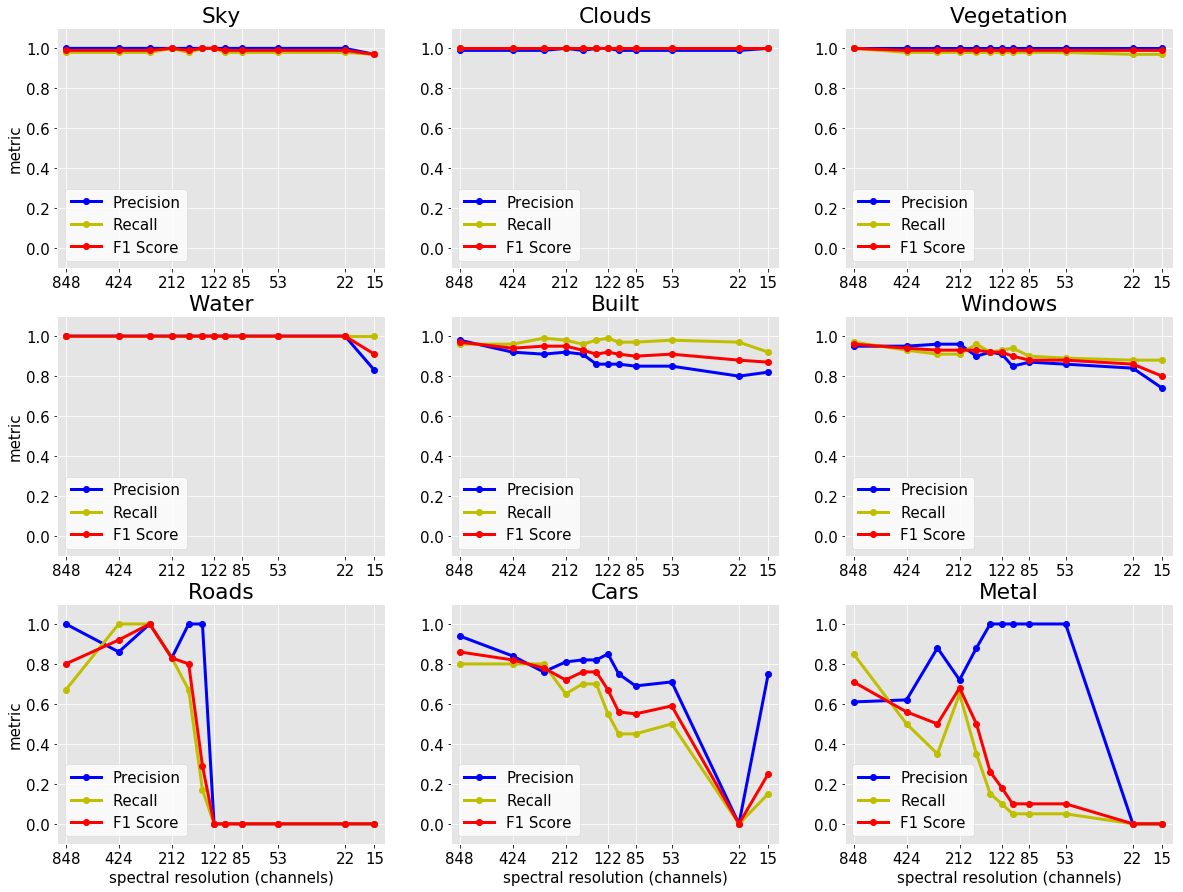

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 15
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 15))
ax1.plot(channels, sky_prec['108'][0], '-o', color='b', lw=3, label='Precision')
ax1.plot(channels, sky_recall['108'][0], '-o', color='y', lw=3, label='Recall')
ax1.plot(channels, sky_f1['108'][0], '-o', color='r', lw=3, label='F1 Score')
ax1.set(title="Sky")
ax1.set_ylim(-0.1,1.1)
#ax1.set_xlabel("Number of channels")
ax1.set_ylabel("metric")
#ax1.invert_xaxis()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, facecolor='white')
ax1.set_xscale('log', basex=2)
ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.set_xticks(channelsp)
ax1.set_xlim(950, 13)

ax2.plot(channels, clouds_prec['108'][0], '-o', color='b', lw=3)
ax2.plot(channels, clouds_recall['108'][0], '-o', color='y', lw=3)
ax2.plot(channels, clouds_f1['108'][0], '-o', color='r', lw=3)
ax2.set(title="Clouds")
ax2.set_ylim(-0.1,1.1)
#ax2.set_xlabel("Number of channels")
#ax2.set_ylabel("Precision")
ax2.invert_xaxis()
ax2.legend(handles, labels, facecolor='white')
ax2.set_xscale('log', basex=2)
ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.set_xticks(channelsp)
ax2.set_xlim(950, 13)

ax3.plot(channels, veg_prec['108'][0], '-o', color='b', lw=3)
ax3.plot(channels, veg_recall['108'][0], '-o', color='y', lw=3)
ax3.plot(channels, veg_f1['108'][0], '-o', color='r', lw=3)
ax3.set(title="Vegetation")
ax3.set_ylim(-0.1,1.1)
#ax3.set_xlabel("Number of channels")
#ax3.set_ylabel("Precision")
ax3.invert_xaxis()
ax3.legend(handles, labels, facecolor='white')
ax3.set_xscale('log', basex=2)
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.set_xticks(channelsp)
ax3.set_xlim(950, 13)

ax4.plot(channels, wtr_prec['108'][0], '-o', color='b', lw=3)
ax4.plot(channels, wtr_recall['108'][0], '-o', color='y', lw=3)
ax4.plot(channels, wtr_f1['108'][0], '-o', color='r', lw=3)
ax4.set(title="Water")
ax4.set_ylim(-0.1,1.1)
#ax4.set_xlabel("Number of channels")
ax4.set_ylabel("metric")
#ax4.invert_xaxis()
ax4.legend(handles, labels, facecolor='white', loc='lower left')
ax4.set_xscale('log', basex=2)
ax4.xaxis.set_major_formatter(ScalarFormatter())
ax4.set_xticks(channelsp)
ax4.set_xlim(950, 13)

ax5.plot(channels, blt_prec['108'][0], '-o', color='b', lw=3)
ax5.plot(channels, blt_recall['108'][0], '-o', color='y', lw=3)
ax5.plot(channels, blt_f1['108'][0], '-o', color='r', lw=3)
ax5.set(title="Built")
ax5.set_ylim(-0.1,1.1)
#ax5.set_xlabel("Number of channels")
#ax5.set_ylabel("Precision")
ax5.invert_xaxis()
ax5.legend(handles, labels, facecolor='white')
ax5.set_xscale('log', basex=2)
ax5.xaxis.set_major_formatter(ScalarFormatter())
ax5.set_xticks(channelsp)
ax5.set_xlim(950, 13)

ax6.plot(channels, windows_prec['108'][0], '-o', color='b', lw=3, label='Precision')
ax6.plot(channels, windows_recall['108'][0], '-o', color='y', lw=3, label='Recall')
ax6.plot(channels, windows_f1['108'][0], '-o', color='r', lw=3, label='F1 Score')
ax6.set(title="Windows")
ax6.set_ylim(-0.1,1.1)
#ax6.set_xlabel("Number of channels")
#ax6.set_ylabel("Precision")
ax6.invert_xaxis()
ax6.legend(handles, labels, facecolor='white')
ax6.set_xscale('log', basex=2)
ax6.xaxis.set_major_formatter(ScalarFormatter())
ax6.set_xticks(channelsp)
ax6.set_xlim(950, 13)

ax7.plot(channels, rds_prec['108'][0], '-o', color='b', lw=3)
ax7.plot(channels, rds_recall['108'][0], '-o', color='y', lw=3)
ax7.plot(channels, rds_f1['108'][0], '-o', color='r', lw=3)
ax7.set(title="Roads")
ax7.set_ylim(-0.1,1.1)
ax7.set_xlabel("spectral resolution (channels)")
ax7.set_ylabel("metric")
ax7.invert_xaxis()
ax7.legend(handles, labels, facecolor='white', loc='lower left')
ax7.set_xscale('log', basex=2)
ax7.xaxis.set_major_formatter(ScalarFormatter())
ax7.set_xticks(channelsp)
ax7.set_xlim(950, 13)

ax8.plot(channels, cars_prec['108'][0], '-o', color='b', lw=3)
ax8.plot(channels, cars_recall['108'][0], '-o', color='y', lw=3)
ax8.plot(channels, cars_f1['108'][0], '-o', color='r', lw=3)
ax8.set(title="Cars")
ax8.set_ylim(-0.1,1.1)
ax8.set_xlabel("spectral resolution (channels)")
#ax8.set_ylabel("Precision/Recall/F1")
ax8.invert_xaxis()
ax8.legend(handles, labels, facecolor='white')
ax8.set_xscale('log', basex=2)
ax8.xaxis.set_major_formatter(ScalarFormatter())
ax8.set_xticks(channelsp)
ax8.set_xlim(950, 13)

ax9.plot(channels, mtl_prec['108'][0], '-o', color='b', lw=3)
ax9.plot(channels, mtl_recall['108'][0], '-o', color='y', lw=3)
ax9.plot(channels, mtl_f1['108'][0], '-o', color='r', lw=3)
ax9.set(title="Metal")
ax9.set_ylim(-0.1,1.1)
ax9.set_xlabel("spectral resolution (channels)")
#ax9.set_ylabel("Precision/Recall/F1")
ax9.invert_xaxis()
ax9.legend(handles, labels, facecolor='white')
ax9.set_xscale('log', basex=2)
ax9.xaxis.set_major_formatter(ScalarFormatter())
ax9.set_xticks(channelsp)
ax9.set_xlim(950, 13)

#handles, labels = ax6.get_legend_handles_labels()
#ax6.legend(handles, labels, loc='center right', borderaxespad=-10.0)

plt.show()
f.savefig("./plots/CNN_spatial_train_all_By_Class_Binned_metrics.png", bbox_inches='tight', dpi=300)

In [20]:
print(channels)
print('')
print('sky')
print('prec :', sky_prec['108'][0])
print('recall: ', sky_recall['108'][0])
print('f1 :', sky_f1['108'][0])
print('')
print('clouds')
print('prec :', clouds_prec['108'][0])
print('recall: ', clouds_recall['108'][0])
print('f1 :', clouds_f1['108'][0])
print('')
print('veg')
print('prec :', veg_prec['108'][0])
print('recall: ', veg_recall['108'][0])
print('f1 :', veg_f1['108'][0])
print('')
print('water')
print('prec :', wtr_prec['108'][0])
print('recall: ', wtr_recall['108'][0])
print('f1 :', wtr_f1['108'][0])
print('')
print('built')
print('prec :', blt_prec['108'][0])
print('recall: ', blt_recall['108'][0])
print('f1 :', blt_f1['108'][0])
print('')
print('windows')
print('prec :', windows_prec['108'][0])
print('recall: ', windows_recall['108'][0])
print('f1 :', windows_f1['108'][0])
print('')
print('roads')
print('prec :', rds_prec['108'][0])
print('recall: ', rds_recall['108'][0])
print('f1 :', rds_f1['108'][0])
print('')
print('cars')
print('prec :', cars_prec['108'][0])
print('recall: ', cars_recall['108'][0])
print('f1 :', cars_f1['108'][0])
print('')
print('metal')
print('prec :', mtl_prec['108'][0])
print('recall: ', mtl_recall['108'][0])
print('f1 :', mtl_f1['108'][0])

[848 424 283 212 170 142 122 106  85  53  22  15  10   5]

sky
prec : [1.   1.   1.   1.   0.98 1.   1.   1.   1.   1.   1.   1.   1.   0.83]
recall:  [1.   1.   1.   1.   1.   1.   1.   1.   0.98 0.98 0.97 0.95 0.97 0.83]
f1 : [1.   1.   1.   1.   0.99 1.   1.   1.   0.99 0.99 0.98 0.97 0.98 0.83]

clouds
prec : [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.92]
recall:  [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.99]
f1 : [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.95]

veg
prec : [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.99 0.98]
recall:  [0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.98 0.99 0.98 0.98 0.98 0.95]
f1 : [1.   1.   1.   1.   1.   1.   1.   1.   0.99 1.   0.99 0.99 0.99 0.97]

water
prec : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
recall:  [1.  1.  1.  1.  1.  1.  1.  1.  1.  0.8 0.9 0.6 1.  0. ]
f1 : [1.   1.   1.   1.   1.   1.   1.   1.   1.   0.89 0.95 0.75 1.   0.  ]

built
prec

In [23]:
print(np.mean(windows_prec['108'][0]))
print(np.mean(windows_recall['108'][0]))
print(np.mean(windows_f1['108'][0]))

0.8728571428571429
0.885
0.8764285714285714


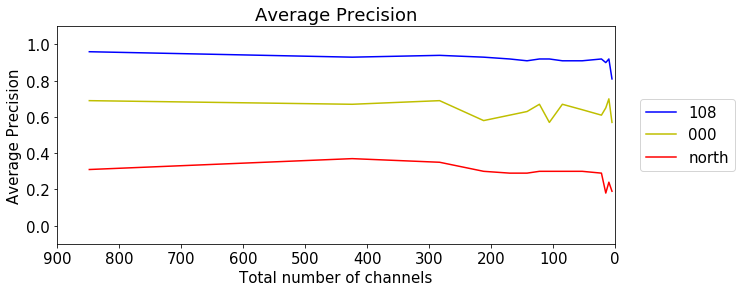

In [20]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, avg_prec['108'][0], color='b', label='108')
ax.plot(channels, avg_prec['000'][0], color='y', label='000')
ax.plot(channels, avg_prec['north'][0], color='r', label='north')
ax.set(title="Average Precision")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Average Precision")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

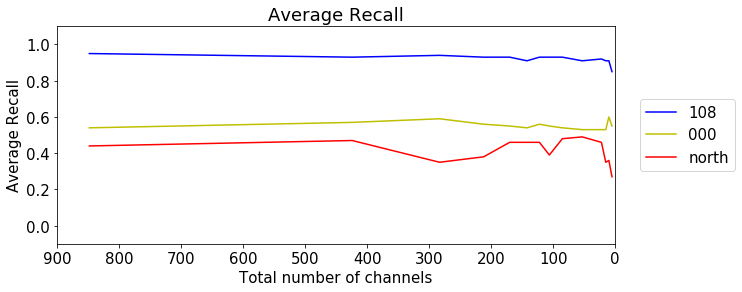

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, avg_recall['108'][0], color='b', label='108')
ax.plot(channels, avg_recall['000'][0], color='y', label='000')
ax.plot(channels, avg_recall['north'][0], color='r', label='north')
ax.set(title="Average Recall")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Average Recall")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

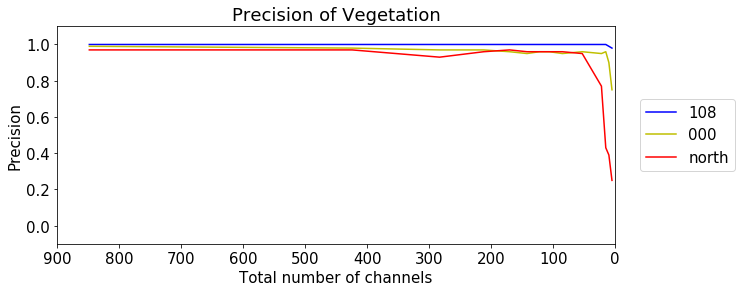

In [22]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, veg_prec['108'][0], color='b', label='108')
ax.plot(channels, veg_prec['000'][0], color='y', label='000')
ax.plot(channels, veg_prec['north'][0], color='r', label='north')
ax.set(title="Precision of Vegetation")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Precision")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

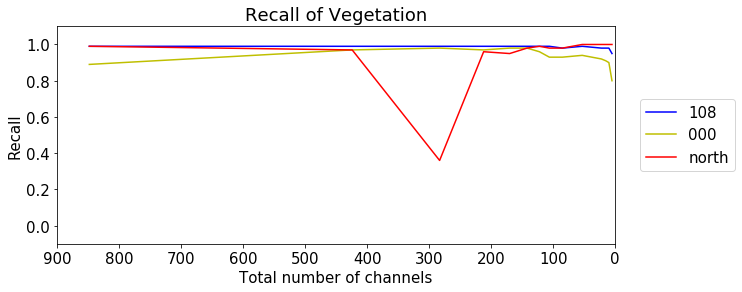

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, veg_recall['108'][0], color='b', label='108')
ax.plot(channels, veg_recall['000'][0], color='y', label='000')
ax.plot(channels, veg_recall['north'][0], color='r', label='north')
ax.set(title="Recall of Vegetation")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Recall")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def plot_predict_map(image1, image2, image3, i):
    bins = channels[i]
    acc = np.around(np.array([accuracy['108'][0][i], accuracy['000'][0][i], accuracy['north'][0][i]]),2)
    pre = np.around(np.array([avg_prec['108'][0][i], avg_prec['000'][0][i], avg_prec['north'][0][i]]),2)
    rec = np.around(np.array([avg_recall['108'][0][i], avg_recall['000'][0][i], avg_recall['north'][0][i]]),2)
    vpre = np.around(np.array([veg_prec['108'][0][i], veg_prec['000'][0][i], veg_prec['north'][0][i]]),2)
    vrec = np.around(np.array([veg_recall['108'][0][i], veg_recall['000'][0][i], veg_recall['north'][0][i]]),2)
    img1 = mpimg.imread(image1)
    img2 = mpimg.imread(image2)
    img3 = mpimg.imread(image3)
    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20,6))
    imgplot1 = ax1.imshow(img1)
    imgplot2 = ax2.imshow(img2)
    imgplot3 = ax3.imshow(img3)
    ax1.set_xlim(35, 1015)
    ax1.set_ylim(500, 5)
    ax1.set_title(r"$\bf{" + str(bins) + "}$" + ': 108/' + 'a: ' + r"$\bf{" + str(acc[0]) + "}$" 
                  + '/p: ' + r"$\bf{" + str(pre[0]) + "}$" + '/r: ' + r"$\bf{" + str(rec[0]) + "}$"
                  + '/vp: '  + r"$\bf{" + str(vpre[0]) + "}$" + '/vr: '  + r"$\bf{" + str(vrec[0]) + "}$", loc='left')
    ax1.set_axis_off()
    ax2.set_xlim(35, 1015)
    ax2.set_ylim(500, 5)
    ax2.set_title(r"$\bf{" + str(bins) + "}$" + ': 000/' + 'a: ' + r"$\bf{" + str(acc[1]) + "}$" 
                  + '/p: ' + r"$\bf{" + str(pre[1]) + "}$" + '/r: ' + r"$\bf{" + str(rec[1]) + "}$"
                  + '/vp: '  + r"$\bf{" + str(vpre[1]) + "}$" + '/vr: '  + r"$\bf{" + str(vrec[1]) + "}$", loc='left')
    ax2.set_axis_off()
    ax3.set_xlim(35, 1015)
    ax3.set_ylim(500, 5)
    ax3.set_title(r"$\bf{" + str(bins) + "}$" + ': north/' + 'a: ' + r"$\bf{" + str(acc[2]) + "}$" 
                  + '/p: ' + r"$\bf{" + str(pre[2]) + "}$" + '/r: ' + r"$\bf{" + str(rec[2]) + "}$"
                  + '/vp: '  + r"$\bf{" + str(vpre[2]) + "}$" + '/vr: '  + r"$\bf{" + str(vrec[2]) + "}$", loc='left')
    ax3.set_axis_off()
    plt.show()


TITLE:
# of channels: image / accuracy / avg. precision / avg. recall / vegetation precision / vegetation recall


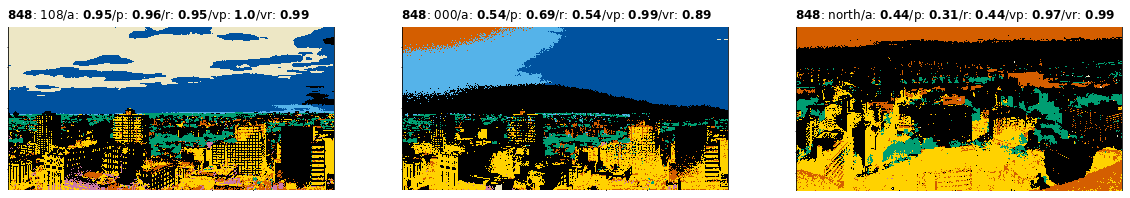

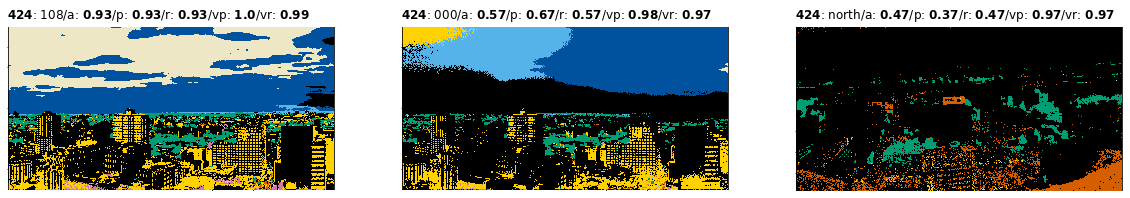

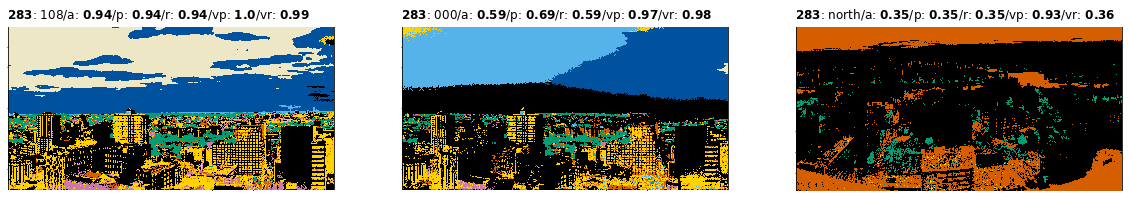

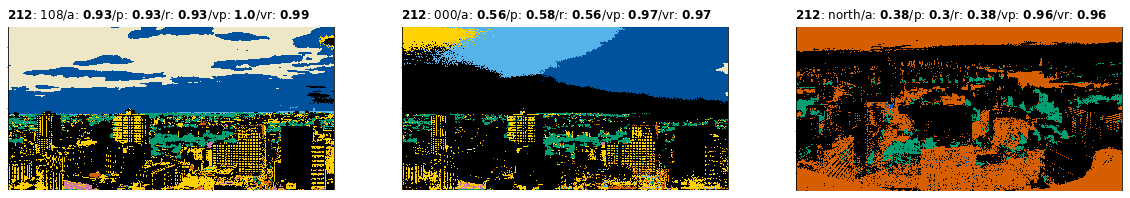

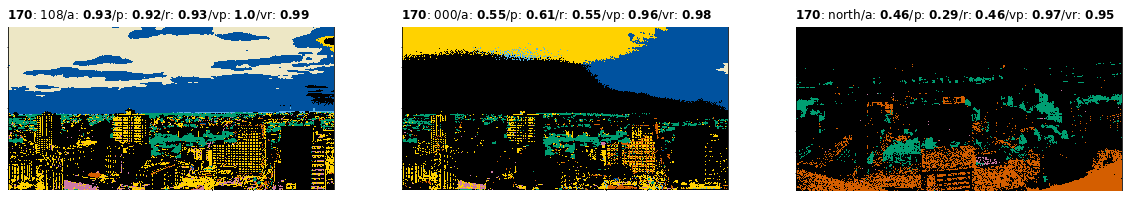

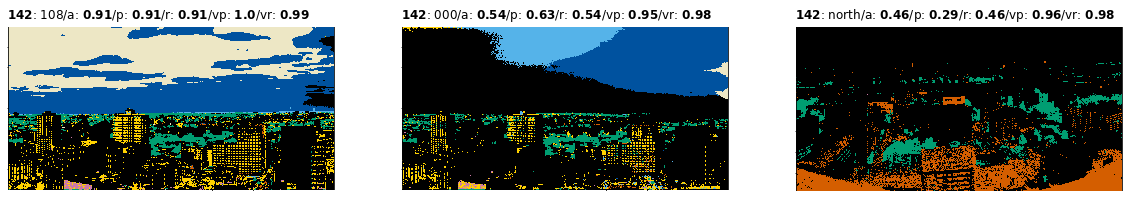

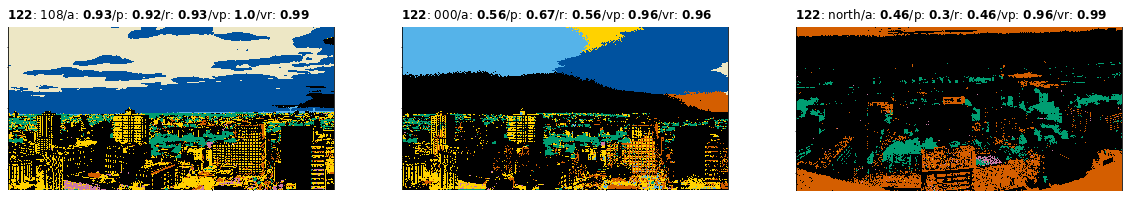

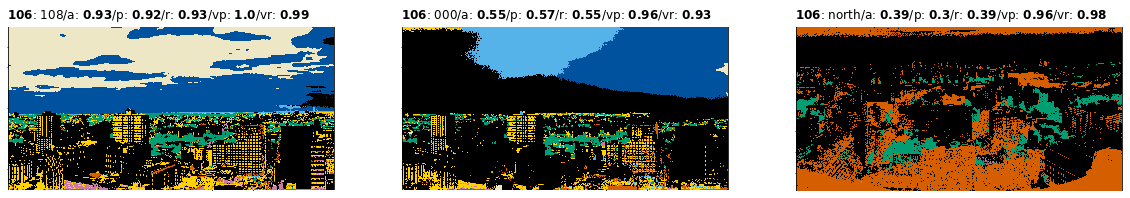

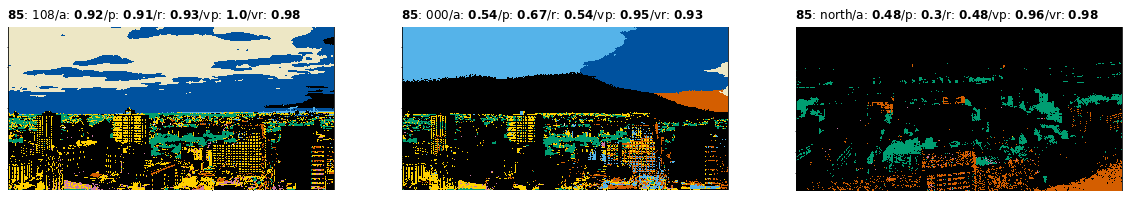

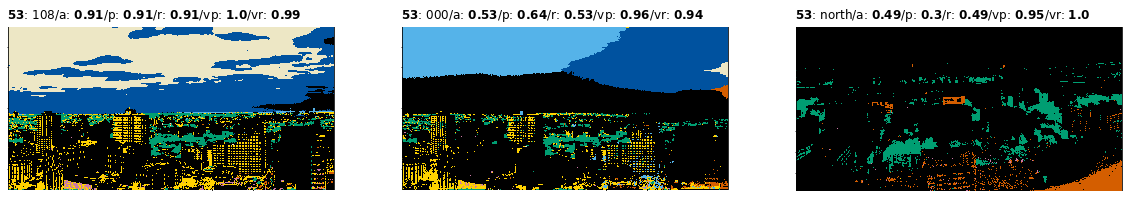

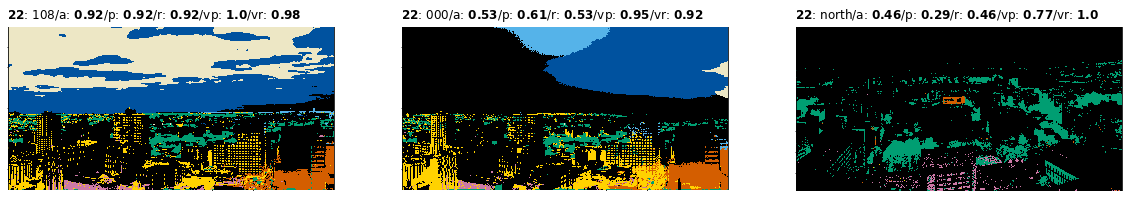

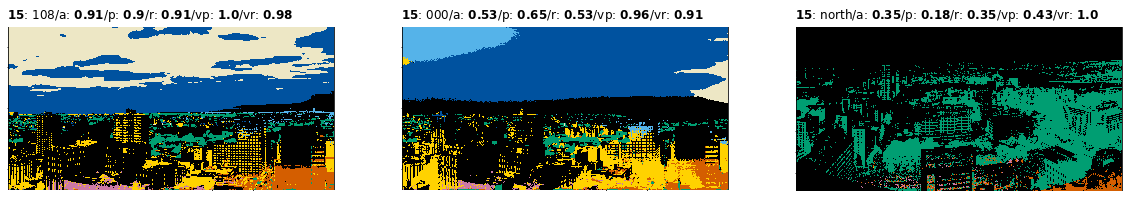

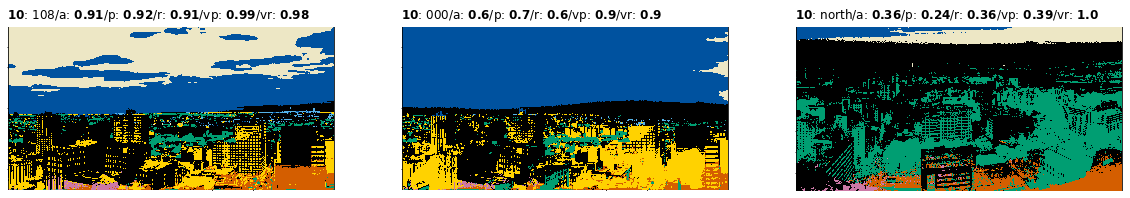

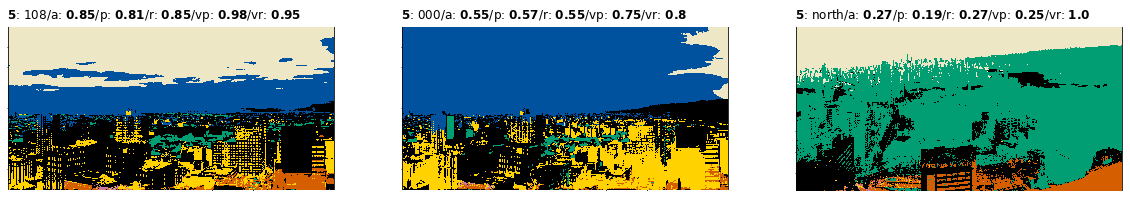

In [29]:
print("TITLE:")
print("# of channels: image / accuracy / avg. precision / avg. recall / vegetation precision / vegetation recall")

image1 = './plots/CNN_change_params_spatial_train_108_6_108_predict_map.png'
image2 = './plots/CNN_change_params_spatial_train_108_9_000_predict_map.png'
image3 = './plots/CNN_change_params_spatial_train_108_11_north_predict_map.png'
plot_predict_map(image1, image2, image3, 0)

for i in range(1,channels.shape[0]):
    bins = channels[i]
    image1 = './plots/CNN_spatial_train_108_binned_' + str(bins) + '_6_108_predict_map.png'
    image2 = './plots/CNN_spatial_train_108_binned_' + str(bins) + '_9_000_predict_map.png'
    image3 = './plots/CNN_spatial_train_108_binned_' + str(bins) + '_11_north_predict_map.png'
    plot_predict_map(image1, image2, image3, i)